### Name - Bolonghe B.P.M
### Index No - 190095C
### GitHub repository - https://github.com/Pasindu-Manodara/Image-Processing.git

##### Question 1

In [308]:
import random
def RadiusAndCenter(randomPoints):
    # taking 3 points
    A_c =X[randomPoints[0]]
    B_c = X[randomPoints[1]]
    C_c = X[randomPoints[2]]

    middle_AB = [(A_c[0]+B_c[0])/2,(A_c[1]+B_c[1])/2] # take the middle point on AB line  
    middle_BC = [(B_c[0]+C_c[0])/2,(B_c[1]+C_c[1])/2] # take the middle point on BC line
   
    if (B_c[1]-A_c[1])!=0 and (C_c[1]-B_c[1])!=0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1])  # take the orthogonal line to AB and BC     
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1])        

        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0]        
        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]        

        Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)
        Center_Y = AB_perpendiular_gradient*Center_X + AB_perpendiular_C # compute center coordinates

    elif (B_c[1]-A_c[1])==0:
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1]) 
        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]  

        Center_Y = B_c[1]
        Center_X = (Center_Y-BC_perpendiular_C)/BC_perpendiular_gradient

    elif (C_c[1]-B_c[1])==0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1]) 
        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0] 

        Center_Y = B_c[1]
        Center_X = (Center_Y-AB_perpendiular_C)/AB_perpendiular_gradient

    radius = ((Center_Y-A_c[1])**2 + (Center_X-A_c[0])**2)**0.5 # calculate the radius
    return Center_X,Center_Y,radius

In [1]:
def DistanceBW2Pts(pt1,pt2):
    return ((pt2[1]-pt1[1])**2+(pt2[0]-pt1[0])**2)**0.5  

In [312]:
def ransac(P_list):
    threshold =1
    pointsList=[]
    countlist = []
    iterations = 35
    
    for k in range(iterations):
        count = 0
        randomPoints = []
        for i in range(3):
            randomPoints.append(random.randint(0,len(P_list)-1)) # take three random points
        pointsList.append(randomPoints)
        for j in range(len(P_list)):
            """Check whether otherpoints are inliers"""
            if abs(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],P_list[j])-RadiusAndCenter(randomPoints)[2]) <= threshold: 
                count+=1                
        countlist.append(count)
    pt =RadiusAndCenter(pointsList[countlist.index(max(countlist))])
    return pt

In [313]:
points = ransac(X)
threshold = 1
inliers = []
for j in range(100):# compute inliers
    if abs(DistanceBW2Pts(points[0:2],X[j])-points[2]) <= threshold:
        inliers.append(j)

Outliers =[] #compute outliers
for i in range(100):
    if i not in inliers:
        Outliers.append(i)
        
bestFit = np.array([X[j] for j in inliers])
BF = ransac(bestFit)#compute best sample

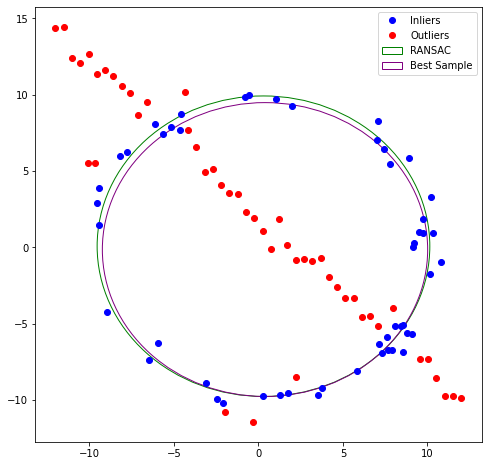

In [323]:
plt.figure(figsize=(8,8))
X1=[]
Y1=[]
for item in inliers:
    X1.append(X[item][0])
    Y1.append(X[item][1])
    
plt.plot(X1,Y1,'o',color='b',label="Inliers")
X2=[]
Y2=[]
for item in Outliers:
    X2.append(X[item][0])
    Y2.append(X[item][1])
    
plt.plot(X2,Y2,'o',color='r',label="Outliers")
circle = plt.Circle((points[0],points[1]),points[2],fill=False,color='g',label="RANSAC")
circle2=plt.Circle((BF[0],BF[1]),BF[2],fill=False,color='purple',label="Best Sample")
plt.gca().add_patch(circle)
plt.gca().add_patch(circle2)
plt.legend()
plt.show()

#### Discussion

In Question 1, what I have done is that took any random three points and make a circle which goes through that three points. Then I have calculated the radius and the Center coordinates of that circle. Then I checked how many inliers around that circle and give a count according to number of inliers.After that I did the same thing 35 times and got the circle which have madximum inliers. Then I got the best sample by doing the same thing for inliers that I have calulated in the previous case.

### Question 2

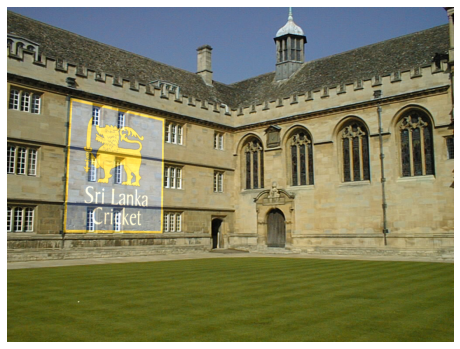

In [303]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = []
def mousePoints(event,x,y,flags,params):# get mouse clicking coordinates    
    if event == cv.EVENT_LBUTTONDOWN:        
        points.append([x,y])
img1 = cv.imread(r"./images/001.jpg")
assert img1 is not None
img2 = cv.imread(r"./images/Logo_of_Sri_Lanka_Cricket.png")
assert img2 is not None

cv.imshow("Image",img1)
cv.setMouseCallback("Image",mousePoints)
cv.waitKey(0)
cv.destroyAllWindows()

des = np.array(points)
src = np.array([[0,0],[316,0],[0,316],[316,316]]) #boundry coordinates of imag2
h, status = cv.findHomography(src, des) # find homography matrix
im_out = cv.warpPerspective(img2, h, (img1.shape[1],img1.shape[0]))
im_out = cv.addWeighted(img1,1,im_out,0.5,0)
im_out = cv.cvtColor(im_out,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(im_out)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

#### Discussion
In this question (Question 2), One image have been superimposed into another image. It's done by computing the homography matrix using mouse clicking coordinates of one image and boundary coordinates of other image.


### Question 3

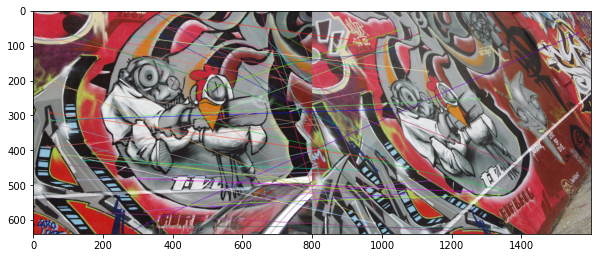

In [6]:
img1 = cv.imread(r'./Images/img1.ppm')
img4 = cv.imread(r'./Images/img4.ppm')
assert img1 is not None

sift = cv.SIFT.create()
keyPoints1,Discriptor1 = sift.detectAndCompute(img1,None)
keyPoints2,Discriptor2 = sift.detectAndCompute(img4,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(Discriptor1,Discriptor2)
matches = sorted(matches, key= lambda x:x.distance)

img3 = cv.drawMatches(img1,keyPoints1,img4,keyPoints2,matches[:50],img4,flags=2)
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(img3)
plt.show()

In [326]:
img1=cv.imread(r'./Images/img1.ppm')
img4=cv.imread(r'./Images/img4.ppm')
img5=cv.imread(r'./Images/img5.ppm')
assert img5 is not None

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
gray5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

keypoint1, descriptor1 = sift.detectAndCompute(gray1,None) #take keypoints and discriptors
keypoint4, descriptor4 = sift.detectAndCompute(gray4,None)
keypoint5, descriptor5 = sift.detectAndCompute(gray5,None)

bf = cv.BFMatcher()
matches1to4 = bf.knnMatch(descriptor1,descriptor4,k=2)
matches4to5 = bf.knnMatch(descriptor4,descriptor5,k=2)

goodMatch1to4 = [] # take best matching points
for m,n in matches1to4:
    if m.distance < 0.75*n.distance:
        goodMatch1to4.append([m])

goodMatch4to5 = []
for m,n in matches4to5:
    if m.distance < 0.75*n.distance:
        goodMatch4to5.append([m])

dst_pts1to4 = np.float32([keypoint1[m[0].queryIdx].pt for m in goodMatch1to4]).reshape(-1, 2)
src_pts1to4 = np.float32([keypoint4[m[0].trainIdx].pt for m in goodMatch1to4]).reshape(-1, 2)

dst_pts4to5 = np.float32([keypoint4[m[0].queryIdx].pt for m in goodMatch4to5]).reshape(-1, 2)
src_pts4to5 = np.float32([keypoint5[m[0].trainIdx].pt for m in goodMatch4to5]).reshape(-1, 2)

def randomPoints(src,dst):
    randomPoints_L = [] # take 4 random points
    for i in range(4):
        randomPoints_L.append(random.randint(0,len(dst)-1))
    src_p=np.array([src[i] for i in randomPoints_L]).astype(np.float32)
    dst_p = np.array([dst[i] for i in randomPoints_L]).astype(np.float32)
    return src_p,dst_p

def homography(src_p,dst_P,n):
    # Compute homography by caluculating A matrix and eigenvectore of A.T @ A
    A=[]
    for i in range(n):
        x, y = src_p[i][0], src_p[i][1]
        xp, yp = dst_P[i][0], dst_P[i][1]
        A.append([x, y, 1, 0, 0, 0, -x * xp, -xp * y, -xp])
        A.append([0, 0, 0, x, y, 1, -yp * x, -yp * y, -yp])
    A=np.asarray(A)
    #print(A)
    w,v = np.linalg.eig(A.T @ A)
    index,=np.where(w==min(w))
    Homography = v.T[int(index)]
    Homography = Homography/Homography[-1]
    return Homography.reshape(3,3)

def ransacHomography(src_Pts, dst_Pts):
    maxI = 0
    maxLSrc = []
    maxLDest = []
    for i in range(70): # execute Ransac alogorithm to get best homography matrix
        srcP, destP = randomPoints(src_Pts, dst_Pts)
        H = homography(srcP, destP, 4)
        #print(H)
        inlines = 0
        linesSrc = []
        lineDest = []
        for p1, p2 in zip(src_Pts, dst_Pts):
            p1U = (np.append(p1, 1)).reshape(3, 1)
            p2e = H.dot(p1U)
            p2e = (p2e / p2e[2])[:2].reshape(1, 2)[0]
            if cv.norm(p2 - p2e) < 50:
                inlines += 1
                linesSrc.append(p1)
                lineDest.append(p2)
        if inlines > maxI:
            maxI = inlines
            maxLSrc = linesSrc.copy()
            maxLSrc = np.asarray(maxLSrc, dtype=np.float32)
            maxLDest = lineDest.copy()
            maxLDest = np.asarray(maxLDest, dtype=np.float32)
    H = homography(maxLSrc, maxLDest, maxI)
    return H

H14 = ransacHomography(src_pts1to4, dst_pts1to4)
H45 = ransacHomography(src_pts4to5,dst_pts4to5)

Homography Matrix of Img1 to Img5 is: [[ 2.14941665e+00 -1.51450668e-01 -4.78253783e+02]
 [-3.08439578e-01  9.07375902e-01  8.30656247e+01]
 [-7.98052985e-04  7.60108576e-05  1.20051384e+00]]


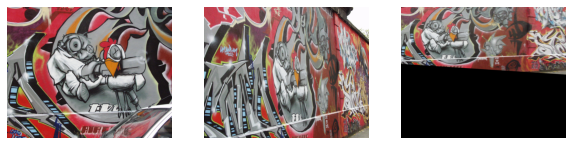

In [15]:
H15 = np.matmul(H14,H45)
print("Homography Matrix of Img1 to Img5 is:",H15)
dst = cv.warpPerspective(img5,H15, (img1.shape[1] + img5.shape[1], img5.shape[0]+ img5.shape[0]))
fig,ax = plt.subplots(1,3,figsize=(10,8))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")

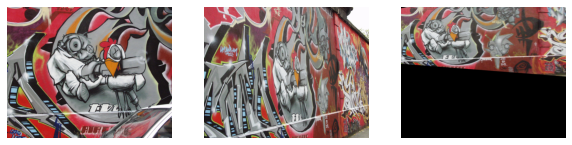

In [16]:
H_original = np.array([[6.2544644e-01,   5.7759174e-02,   2.2201217e+02],
   [2.2240536e-01,   1.1652147e+00 , -2.5605611e+01],
   [4.9212545e-04 , -3.6542424e-05 ,  1.0000000e+00]])

dst = cv.warpPerspective(img5,np.linalg.inv(H_original), (img1.shape[1] + img5.shape[1], img5.shape[0]+ img5.shape[0]))
fig,ax = plt.subplots(1,3,figsize=(10,8))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")

In [337]:
def ssd(A,B):
  dif = A.ravel().astype(int) - B.ravel().astype(int)
  return np.dot( dif, dif )/len(dif)
print(ssd(H15,H_original))

55857.11111111111


#### Discussion
Since there is a kind of high transformation between img1 and img5, homography matrix can not be identified easily using sift. Therefore what I have done is that calculated the homography matrixes H14 and H45 seperately and take the multiplication of those two and computed the homography matrix between img1 and img5. When I stiched those two images using calulated homography matrix and given homography matrix, there is not such a big different that human eye can catch. But when I calculate sum of square difference it gives a value around 50000.